# SGD

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap    

In [3]:
# Let's create our training data of 30 pairs {x_i, y_i}
# We'll try to fit the Gabor model to these data
data = np.array([[-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
                 -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
                 -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
                  1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
                 -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
                  [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
                  9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
                  -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
                  6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
                  -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]])
     

#### Gabor Model Components:

The model consists of two components:

1. **Sine Component**:
   $$
   \sin(\theta_0 + 0.06 \cdot \theta_1 \cdot x)
   $$

2. **Gaussian Component**:
   $$
   \exp\left(-\frac{(\theta_0 + 0.06 \cdot \theta_1 \cdot x)^2}{32}\right)
   $$

The final predicted value ($ \ y_{\text{pred}} \ $) is the product of these two components:
$$
y_{\text{pred}} = \sin(\theta_0 + 0.06 \cdot \theta_1 \cdot x) \cdot \exp\left(-\frac{(\theta_0 + 0.06 \cdot \theta_1 \cdot x)^2}{32}\right)
$$


In [4]:
def model(theta, x):
    sin_component = np.sin(theta[0] + 0.06 * theta[1] * x)
    gauss_component = np.exp(-(theta[0] + 0.06 * theta[1] * x) ** 2 / 32)
    y_pred = sin_component * gauss_component
    return y_pred

In [5]:
# Draw model
def draw_model(data, model, theta, title=None):
    """
    Draws the model predictions along with the data points.

    Parameters:
    - data: The dataset (x and y values).
    - model: The model used to make predictions.
    - theta: The current parameter values (intercept and slope).
    - title: Optional title for the plot.
    """
    
    # Generate x values for the model
    x_model = np.arange(-15, 15, 0.1)
    
    # Compute y values using the model and current theta
    y_model = model(theta, x_model)

    # Create a plot
    fig, ax = plt.subplots()
    
    # Plot the actual data points
    ax.plot(data[0, :], data[1, :], 'bo', label='Data')
    
    # Plot the model prediction line
    ax.plot(x_model, y_model, 'm-', label='Model')

    # Set plot limits and labels
    ax.set_xlim([-15, 15])
    ax.set_ylim([-1, 1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Set title if provided
    if title is not None:
        ax.set_title(title)
    
    # Show the plot
    plt.show()

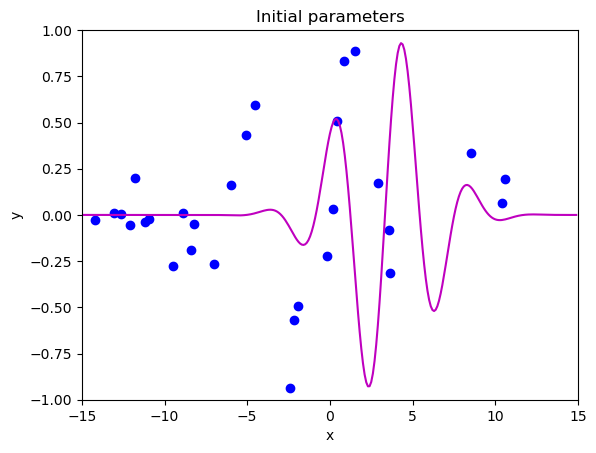

In [6]:
# Initialize the parameters and draw the model
theta = np.zeros((2, 1))
theta[0] = -5      # Horizontal offset
theta[1] = 25      # Frequency

# Draw the model with initial parameters
draw_model(data, model, theta, "Initial parameters")

Now let's compute the sum of squares loss for the training data

### Mean Squared Error (MSE) Loss Function

The **Mean Squared Error (MSE)** is a commonly used loss function in regression problems. It measures the average of the squared differences between the predicted values and the actual values.

#### Steps to Compute MSE:

1. **Model Predictions**: Use the model function to compute predictions for the input data ($ \ \text{data\_x} \ $) using the current parameters $ \ \theta \ $.
2. **Squared Differences**: Compute the squared difference between the predicted values ($ \ y_{\text{pred}} \ $) and the actual values ( $ \ y_{\text{true}} \ $).
3. **Sum of Squared Differences**: Sum all these squared differences to get the total loss.

#### MSE Formula:

$$
\text{Loss} = \frac{1}{N} \sum_{i=1}^{N} \left( y_{\text{pred}}^{(i)} - y_{\text{true}}^{(i)} \right)^2
$$

Where:
- $ \ y_{\text{pred}} \ $ is the predicted value from the model.
- $ \ y_{\text{true}} \ $ is the actual value from the dataset.
- $ \ N \ $ is the number of data points.

In [7]:
def compute_loss(data_x, data_y, model, theta):
    """
    Computes Mean Squared Error (MSE) loss between predicted and true values.
    
    Parameters:
    data_x : array-like
        Input feature data (independent variable).
    data_y : array-like
        True output data (dependent variable).
    model : function
        The model that predicts `y` values based on `x` and `theta`.
    theta : array-like
        Model parameters (weights).
    
    Returns:
    loss : float
        The computed MSE loss.
    """
    
    # Step 1: Make predictions using the model
    pred_y = model(theta, data_x)
    
    # Step 2: Compute squared differences between predictions and actual values
    squared_diffs = (pred_y - data_y) ** 2
    
    # Step 3: Sum all squared differences and return as loss
    loss = np.sum(squared_diffs)
    
    return loss

Let's just test that we got that right

In [8]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 16.419))

Your loss = 16.419, Correct loss = 16.419


Now let's plot the whole loss function

In [9]:
def draw_loss_function(compute_loss, data, model, theta_iters=None):
    """
    Draws the loss function landscape and optionally plots the trajectory of parameter updates.
    
    Parameters:
    - compute_loss: Function to compute the loss.
    - data: The dataset (x and y values).
    - model: The model used to make predictions.
    - theta_iters: Optional, a history of parameter updates (theta values) over iterations.
    """
    
    # Define a colormap
    my_colormap_vals_hex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', 
                            # Add more color values as needed...
                           )
    
    my_colormap_vals_dec = np.array([int(element, base=16) for element in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec / (256 * 256))
    g = np.floor((my_colormap_vals_dec - r * 256 * 256) / 256)
    b = np.floor(my_colormap_vals_dec - r * 256 * 256 - g * 256)
    my_colormap = ListedColormap(np.vstack((r, g, b)).transpose() / 255.0)

    # Make grid of offset/frequency values to plot
    offsets_mesh, freqs_mesh = np.meshgrid(np.arange(-10, 10.0, 0.1), np.arange(2.5, 22.5, 0.1))
    loss_mesh = np.zeros_like(freqs_mesh)

    # Compute loss for every set of parameters
    for idslope, slope in np.ndenumerate(freqs_mesh):
        loss_mesh[idslope] = compute_loss(data[0, :], data[1, :], model,
                                          np.array([[offsets_mesh[idslope]], [slope]]))

    # Create plot
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 8)
    
    # Plot the loss landscape using a contour plot
    ax.contourf(offsets_mesh, freqs_mesh, loss_mesh, 256, cmap=my_colormap)
    
    # Add contour lines for better visualization
    ax.contour(offsets_mesh, freqs_mesh, loss_mesh, 20, colors=['#80808080'])

    # If theta_iters is provided (trajectory of theta values), plot them
    if theta_iters is not None:
        ax.plot(theta_iters[0, :], theta_iters[1, :], 'go-', label='Theta Trajectory')

    # Set axis limits and labels
    ax.set_ylim([2.5, 22.5])
    ax.set_xlabel('Offset')
    ax.set_ylabel('Frequency')
    
    plt.show()

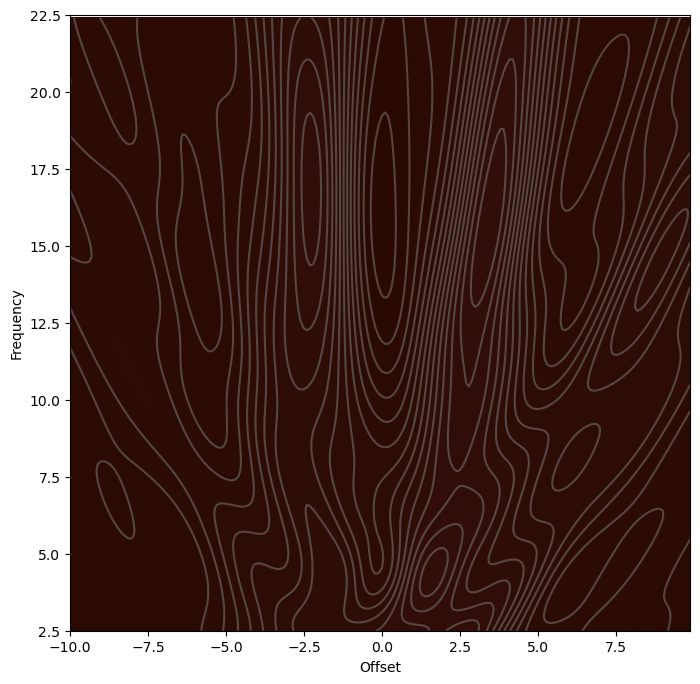

In [10]:
draw_loss_function(compute_loss, data, model)

In [11]:
# These came from writing out the expression for the sum of squares loss and taking the
# derivative with respect to theta0 and theta1. It was a lot of hassle to get it right!
# Derivative of the Gabor function with respect to theta_0 (offset)
def gabor_deriv_theta0(data_x, data_y, theta0, theta1):
    """
    Computes the derivative of the Gabor function with respect to theta_0 (offset).
    
    Parameters:
    - data_x: Input feature data (independent variable).
    - data_y: True output data (dependent variable).
    - theta0: The current value of theta_0 (offset).
    - theta1: The current value of theta_1 (frequency).
    
    Returns:
    - The sum of the derivatives with respect to theta_0.
    """
    x = 0.06 * theta1 * data_x + theta0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x * x / 16)
    
    deriv = cos_component * gauss_component - sin_component * gauss_component * x / 16
    deriv = 2 * deriv * (sin_component * gauss_component - y)
    
    return np.sum(deriv)

# Derivative of the Gabor function with respect to theta_1 (frequency)
def gabor_deriv_theta1(data_x, data_y, theta0, theta1):
    """
    Computes the derivative of the Gabor function with respect to theta_1 (frequency).
    
    Parameters:
    - data_x: Input feature data (independent variable).
    - data_y: True output data (dependent variable).
    - theta0: The current value of theta_0 (offset).
    - theta1: The current value of theta_1 (frequency).
    
    Returns:
    - The sum of the derivatives with respect to theta_1.
    """
    x = 0.06 * theta1 * data_x + theta0
    y = data_y
    cos_component = np.cos(x)
    sin_component = np.sin(x)
    gauss_component = np.exp(-0.5 * x * x / 16)
    
    deriv = 0.06 * data_x * cos_component * gauss_component - 0.06 * data_x * sin_component * gauss_component * x / 16
    deriv = 2 * deriv * (sin_component * gauss_component - y)
    
    return np.sum(deriv)

# Compute gradient for both parameters (theta_0 and theta_1)
def compute_gradient(data_x, data_y, theta):
    """
    Computes the gradient of the loss function with respect to both parameters: 
    theta_0 (offset) and theta_1 (frequency).
    
    Parameters:
    - data_x: Input feature data (independent variable).
    - data_y: True output data (dependent variable).
    - theta: Current parameter values [theta_0, theta_1].
    
    Returns:
    - Gradient as a numpy array [[dl_dtheta0], [dl_dtheta1]].
    """
    
    dl_dtheta0 = gabor_deriv_theta0(data_x, data_y, theta[0], theta[1])
    dl_dtheta1 = gabor_deriv_theta1(data_x, data_y, theta[0], theta[1])
    
    # Return the gradient as a column vector
    return np.array([[dl_dtheta0], [dl_dtheta1]])

In [12]:
# Compute the gradient using your function
gradient = compute_gradient(data[0, :], data[1, :], theta)
print("Your gradients: (%3.3f, %3.3f)" % (gradient[0], gradient[1]))

# Approximate the gradients with finite differences
delta = 0.0001

# Approximate gradient for theta_0 (offset)
dl_dtheta0_est = (compute_loss(data[0, :], data[1, :], model, theta + np.array([[delta], [0]])) - \
                  compute_loss(data[0, :], data[1, :], model, theta)) / delta

# Approximate gradient for theta_1 (frequency)
dl_dtheta1_est = (compute_loss(data[0, :], data[1, :], model, theta + np.array([[0], [delta]])) - \
                  compute_loss(data[0, :], data[1, :], model, theta)) / delta

print("Approx gradients: (%3.3f, %3.3f)" % (dl_dtheta0_est, dl_dtheta1_est))

Your gradients: (3.344, 0.519)
Approx gradients: (3.344, 0.519)


In [13]:
def loss_function_1D(dist_prop, data, model, theta_start, search_direction):
    """
    Computes the loss after moving a certain distance along the search direction.
    
    Parameters:
    - dist_prop: The proportion of the search direction to move.
    - data: The dataset (x and y values).
    - model: The model used to make predictions.
    - theta_start: The starting point of theta (parameters).
    - search_direction: The direction along which to search for the minimum loss.
    
    Returns:
    - The computed loss after moving along the search direction.
    """
    return compute_loss(data[0,:], data[1,:], model, theta_start + search_direction * dist_prop)

def line_search(data, model, theta, gradient, thresh=0.00001, max_dist=0.1, max_iter=15, verbose=False):
    """
    Performs a line search to find the optimal step size along the gradient direction.

    Parameters:
    - data: The dataset (x and y values).
    - model: The model used to make predictions.
    - theta: Current parameters (intercept and slope).
    - gradient: The gradient vector (direction of steepest descent).
    - thresh: Threshold for stopping criteria based on distance between points.
    - max_dist: Maximum distance to search along the gradient direction.
    - max_iter: Maximum number of iterations for line search.
    - verbose: If True, prints intermediate steps.

    Returns:
    - The optimal step size found by the line search.
    """
    
    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b - c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter += 1
        
        # Calculate all four points
        lossa = loss_function_1D(a, data, model, theta, gradient)
        lossb = loss_function_1D(b, data, model, theta, gradient)
        lossc = loss_function_1D(c, data, model, theta, gradient)
        lossd = loss_function_1D(d, data, model, theta, gradient)

        if verbose:
            print(f'Iter {n_iter}, a={a:.3f}, b={b:.3f}, c={c:.3f}, d={d:.3f}')
            print(f'a {lossa:.6f}, b {lossb:.6f}, c {lossc:.6f}, d {lossd:.6f}')

        # Rule #1 If point A is less than points B, C, and D then halve distance from A to points B,C,D
        if np.argmin((lossa, lossb, lossc, lossd)) == 0:
            b = a + (b - a) / 2
            c = a + (c - a) / 2
            d = a + (d - a) / 2
            continue

        # Rule #2 If point B is less than point C then:
        #                     D becomes C,
        #                     B becomes 1/3 between A and new D,
        #                     C becomes 2/3 between A and new D
        if lossb < lossc:
            d = c
            b = a + (d - a) / 3
            c = a + 2 * (d - a) / 3
            continue

        # Rule #3 If point C is less than point B then:
        #                     A becomes B,
        #                     B becomes 1/3 between new A and D,
        #                     C becomes 2/3 between new A and D
        a = b
        b = a + (d - a) / 3
        c = a + 2 * (d - a) / 3

    # Return average of two middle points as optimal step size
    return (b + c) / 2.0

In [14]:
def gradient_descent_step(theta, data, model):
    """
    Performs one step of gradient descent.

    Parameters:
    - theta: Current parameters (offset and frequency).
    - data: The dataset (x and y values).
    - model: The model used to make predictions.

    Returns:
    - Updated theta after one gradient descent step.
    """

    # Step 1: Compute the gradient
    gradient = compute_gradient(data[0, :], data[1, :], theta)

    # Step 2: Update the parameters -- note we want to search in the negative (downhill) direction
    alpha = line_search(data, model, theta, gradient * -1, max_dist=2.0)
    
    # Step 3: Update theta by moving in the negative gradient direction
    theta = theta - alpha * gradient

    return theta

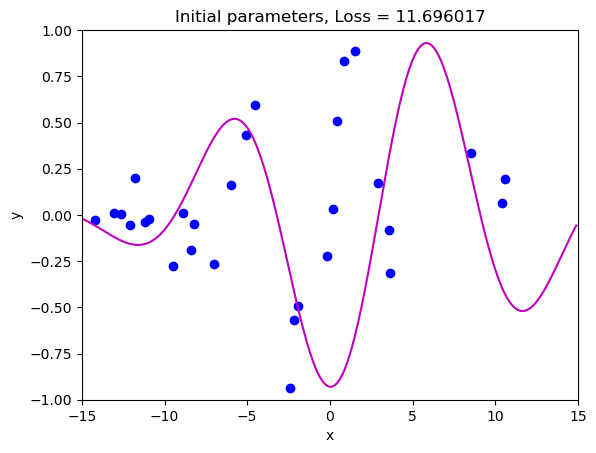

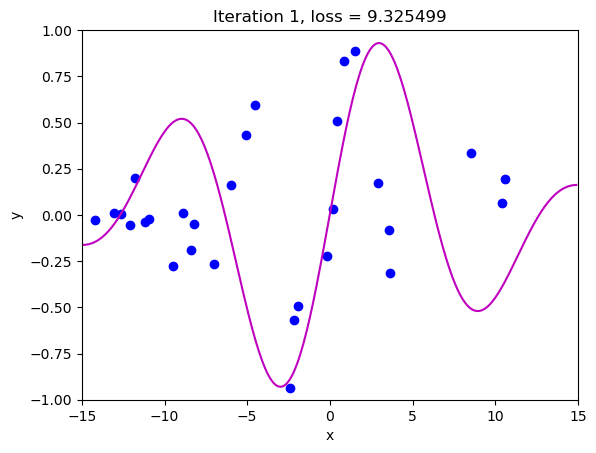

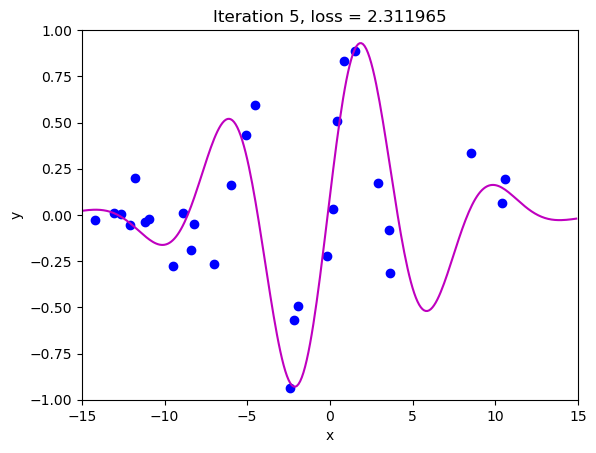

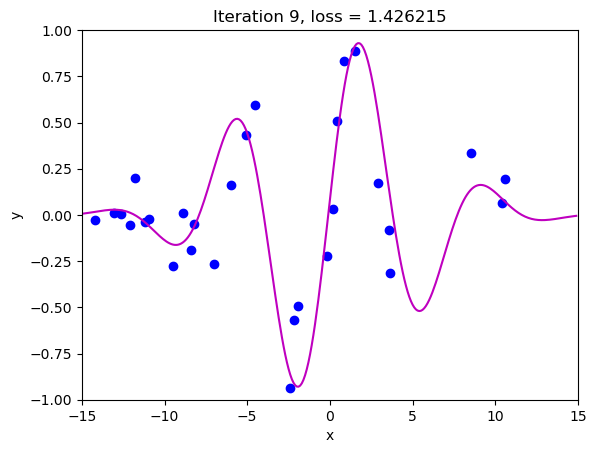

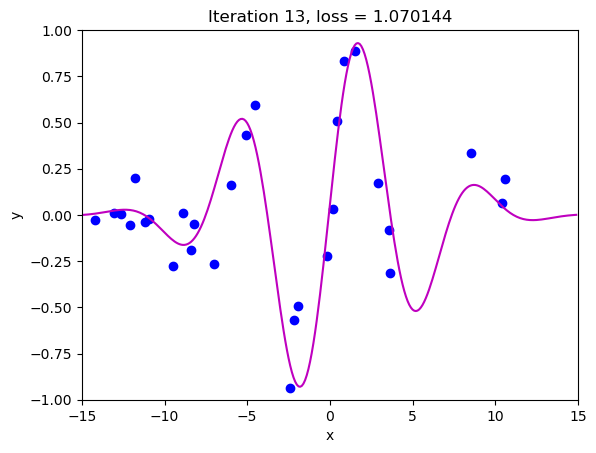

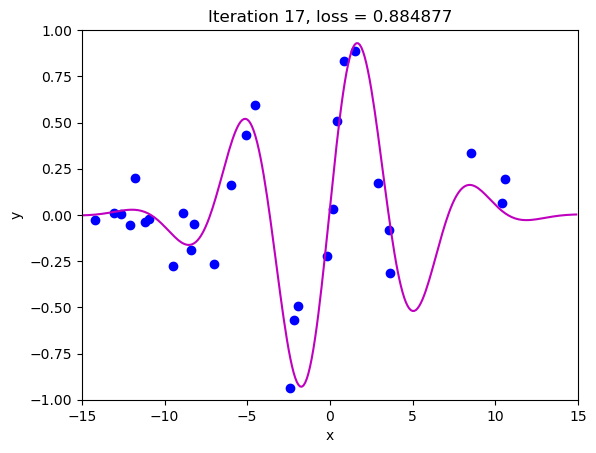

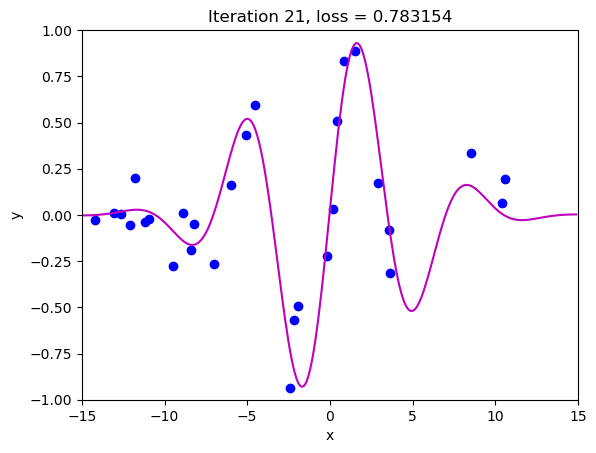

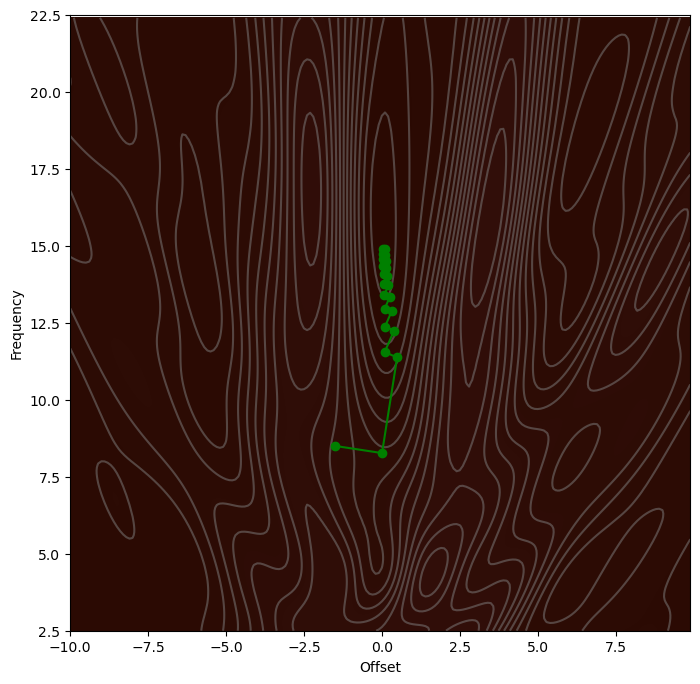

In [15]:
# Initialize the parameters
n_steps = 21
theta_all = np.zeros((2, n_steps + 1))
theta_all[0, 0] = -1.5  # Initial offset
theta_all[1, 0] = 8.5   # Initial frequency

# Measure loss and draw initial model
loss = compute_loss(data[0, :], data[1, :], model, theta_all[:, 0:1])
draw_model(data, model, theta_all[:, 0:1], "Initial parameters, Loss = %f" % (loss))

# Perform gradient descent steps
for c_step in range(n_steps):
    # Do gradient descent step
    theta_all[:, c_step + 1:c_step + 2] = gradient_descent_step(theta_all[:, c_step:c_step + 1], data, model)
    
    # Measure loss and draw model every 4th step
    if c_step % 4 == 0:
        loss = compute_loss(data[0, :], data[1, :], model, theta_all[:, c_step + 1:c_step + 2])
        draw_model(data, model, theta_all[:, c_step + 1], "Iteration %d, loss = %f" % (c_step + 1, loss))

# Draw the trajectory of parameter updates on the loss function landscape
draw_loss_function(compute_loss, data, model, theta_all)

In [16]:
# TODO Experiment with starting the optimization in the previous cell in different places
# and show that it heads to a local minimum if we don't start it in the right valley

In [17]:
def gradient_descent_step_fixed_learning_rate(theta, data, alpha):
  """
    Performs one step of gradient descent using a fixed learning rate.

    Parameters:
    - theta: Current parameters (offset and frequency).
    - data: The dataset (x and y values).
    - model: The model used to make predictions.
    - alpha: Fixed learning rate for the gradient descent step.

    Returns:
    - Updated theta after one gradient descent step.
  """
  # TODO -- fill in this routine so that we take a fixed size step of size alpha without using line search
  # Step 1: Compute the gradient
  gradient = compute_gradient(data[0, :], data[1, :], theta)

  # Step 2: Update the parameters using the fixed learning rate
  theta = theta - alpha * gradient
  return theta

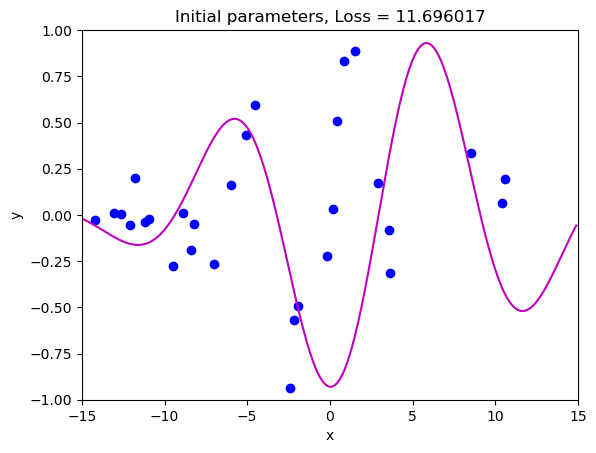

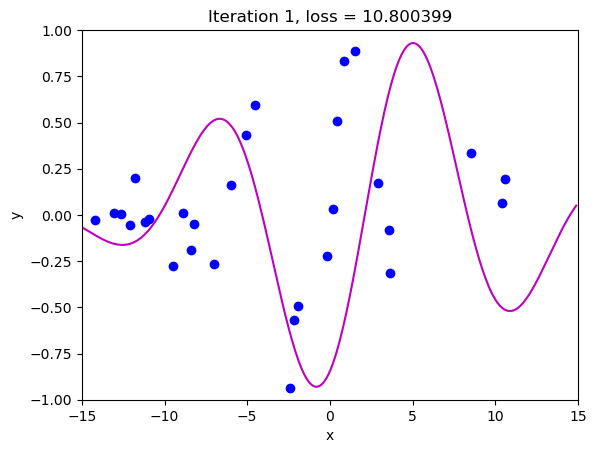

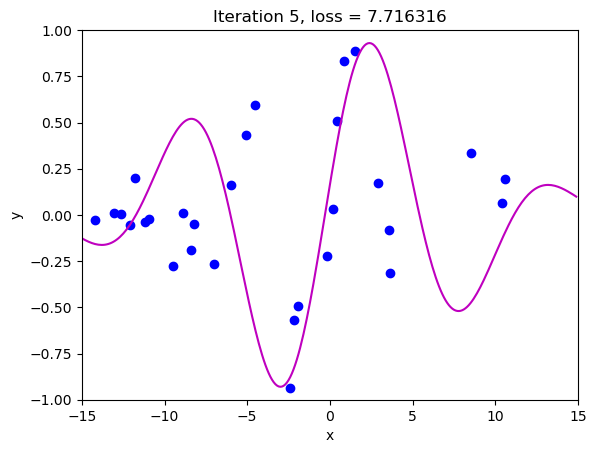

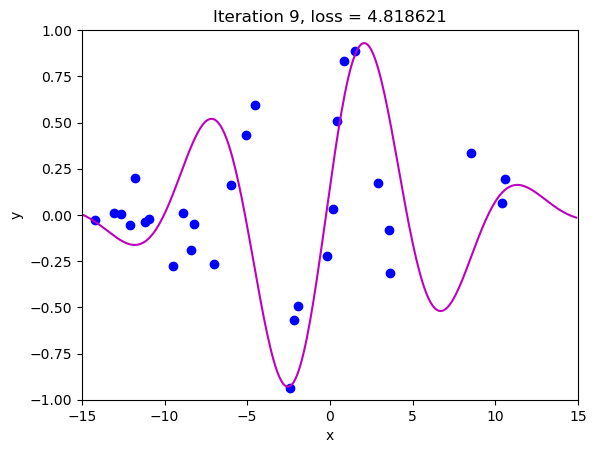

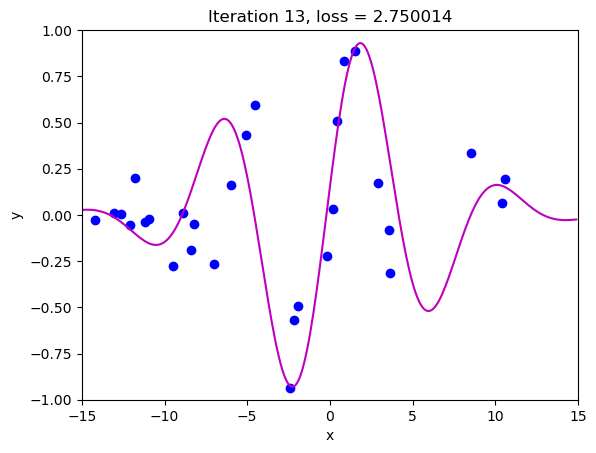

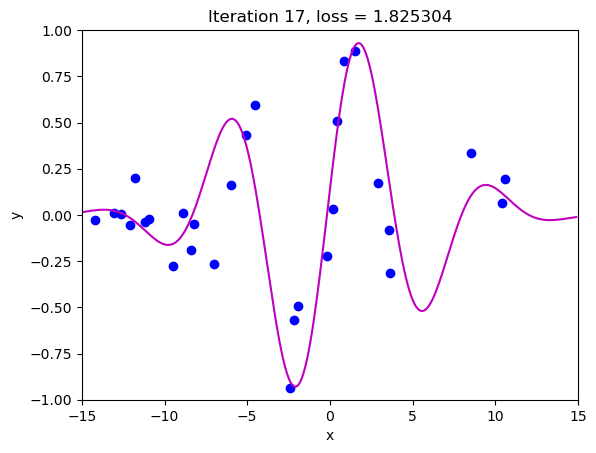

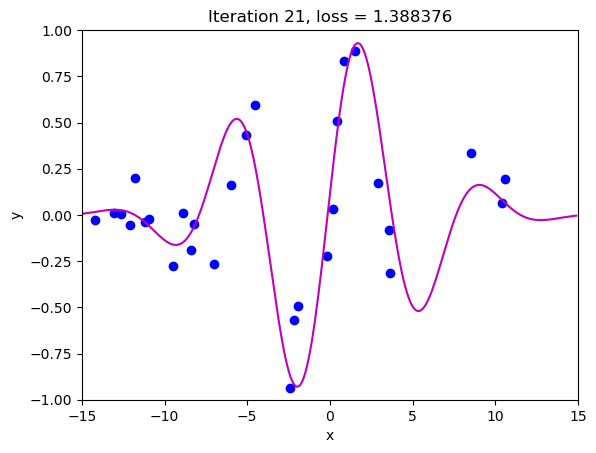

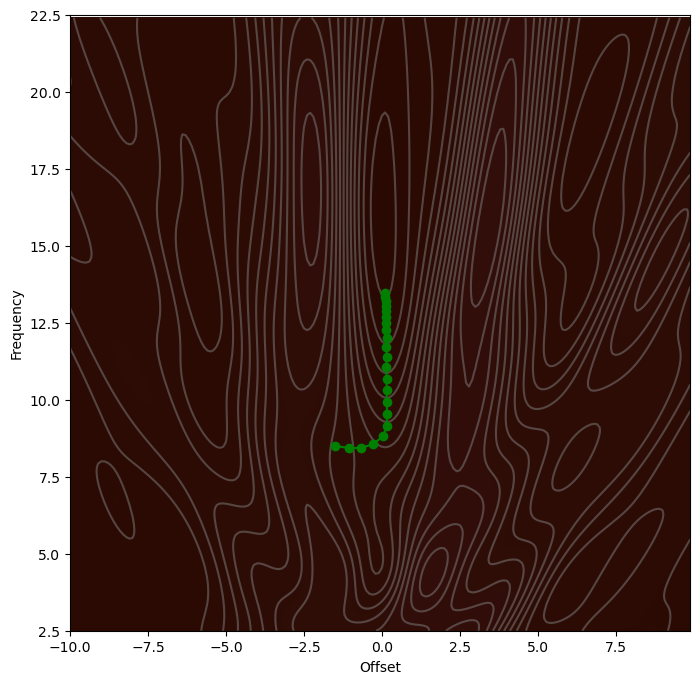

In [20]:
# Initialize the parameters
n_steps = 21
theta_all = np.zeros((2,n_steps+1))
theta_all[0,0] = -1.5
theta_all[1,0] = 8.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, theta_all[:,0:1])
draw_model(data,model,theta_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  theta_all[:,c_step+1:c_step+2] = gradient_descent_step_fixed_learning_rate(theta_all[:,c_step:c_step+1],data, alpha =0.2)
  # Measure loss and draw model every 4th step
  if c_step % 4 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, theta_all[:,c_step+1:c_step+2])
    draw_model(data,model,theta_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model,theta_all)

In [21]:
# TODO Experiment with the learning rate, alpha.
# What happens if you set it too large?
# What happens if you set it too small?

In [22]:
def stochastic_gradient_descent_step(theta, data, alpha, batch_size):
  """
    Performs one step of stochastic gradient descent using a fixed learning rate and a subset (batch) of the data.

    Parameters:
    - theta: Current parameters (offset and frequency).
    - data: The dataset (x and y values).
    - model: The model used to make predictions.
    - alpha: Fixed learning rate for the gradient descent step.
    - batch_size: Number of data points to use in each stochastic gradient descent step.

    Returns:
    - Updated theta after one stochastic gradient descent step.
  """
  
  # TODO -- fill in this routine so that we take a fixed size step of size alpha but only using a subset (batch) of the data
  # at each step
  # You can use the function np.random.permutation to generate a random permutation of the n_data = data.shape[1] indices
  # and then just choose the first n=batch_size of these indices.  Then compute the gradient update
  # from just the data with these indices.   More properly, you should sample without replacement, but this will do for now.
  
  
  # Step 1: Get the number of data points
  n_data = data.shape[1]

  # Step 2: Generate a random permutation of indices and select a batch
  indices = np.random.permutation(n_data)[:batch_size]
  
  # Step 3: Select the batch of data points
  batch_x = data[0, indices]
  batch_y = data[1, indices]

  # Step 4: Compute the gradient using only the selected batch
  gradient = compute_gradient(batch_x, batch_y, theta)

  # Step 5: Update the parameters using the fixed learning rate
  theta = theta - alpha * gradient

  return theta

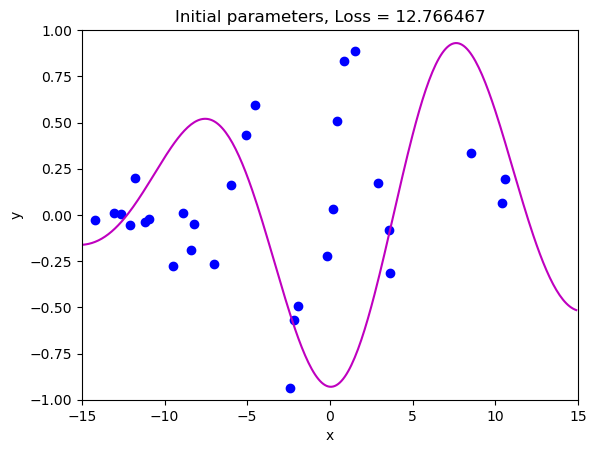

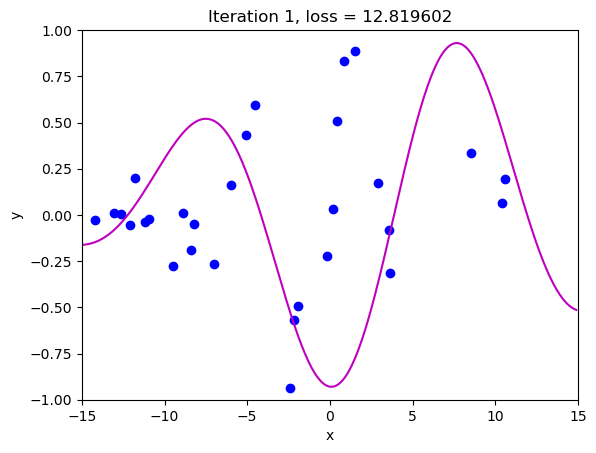

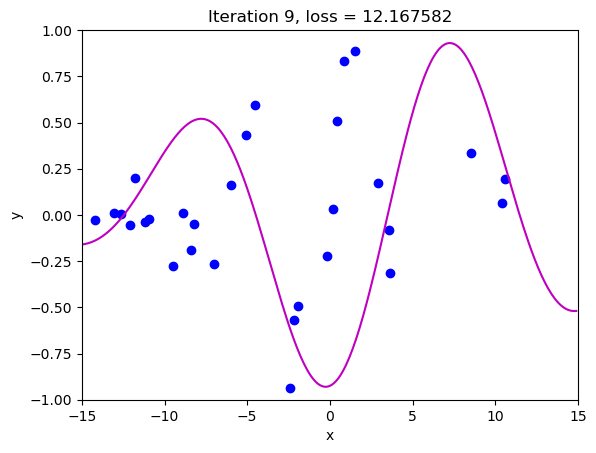

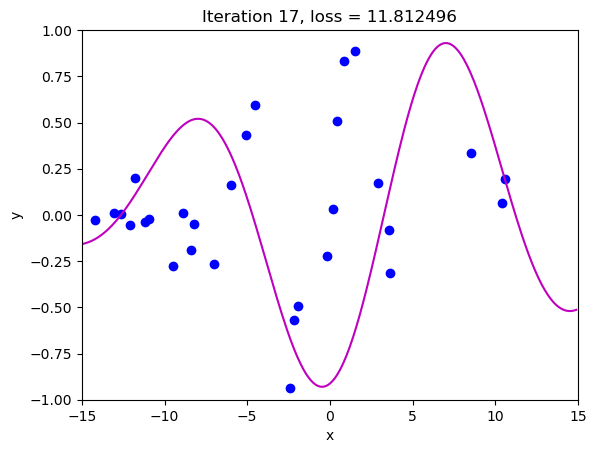

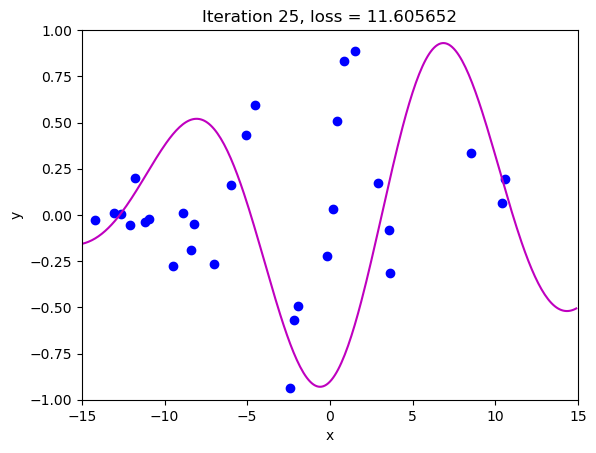

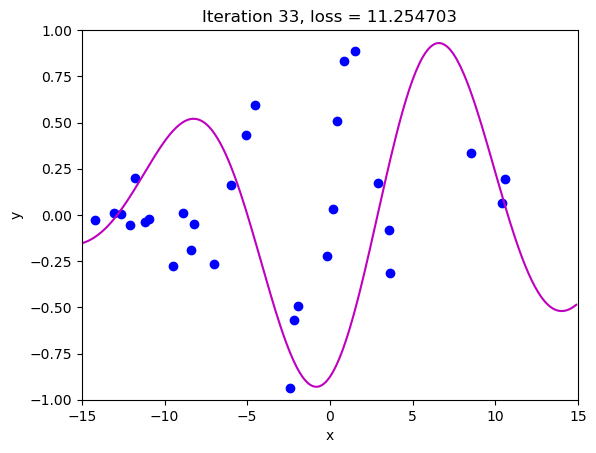

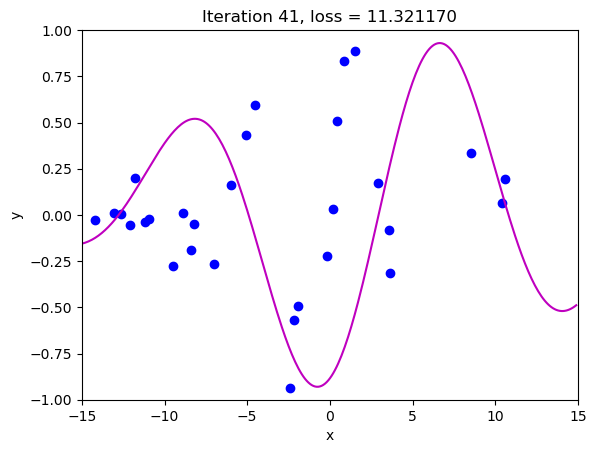

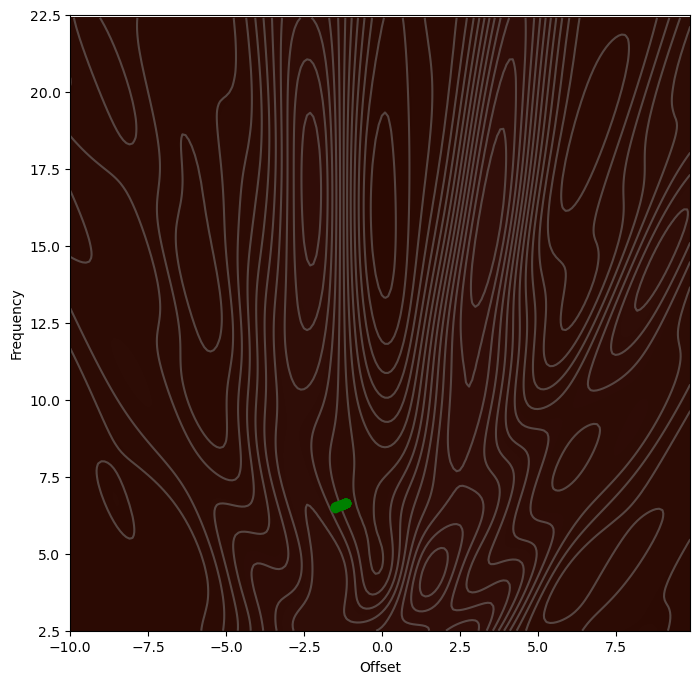

In [25]:
# Set the random number generator so you always get same numbers (disable if you don't want this)
np.random.seed(1)
# Initialize the parameters
n_steps = 41
theta_all = np.zeros((2,n_steps+1))
theta_all[0,0] = -1.5
theta_all[1,0] = 6.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, theta_all[:,0:1])
draw_model(data,model,theta_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

for c_step in range (n_steps):
  # Do gradient descent step
  theta_all[:,c_step+1:c_step+2] = stochastic_gradient_descent_step(theta_all[:,c_step:c_step+1],data, alpha =0.01, batch_size=10)
  # Measure loss and draw model every 8th step
  if c_step % 8 == 0:
    loss =  compute_loss(data[0,:], data[1,:], model, theta_all[:,c_step+1:c_step+2])
    draw_model(data,model,theta_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

draw_loss_function(compute_loss, data, model,theta_all)

In [24]:
# TODO -- Experiment with different learning rates, starting points, batch sizes, number of steps.  Get a feel for this.

In [ ]:
# TODO -- Add a learning rate schedule.  Reduce the learning rate by a factor of beta every M iterations